# Boston Bluebikes Data Exploration & Visualization
## by Ayman Metwally

<a id='Back_to_Top'></a>
### Index:
1. [Introduction](#a)
2. [Gathering & Assessing Data](#b)
3. [Cleaning Data](#c)
4. [Univariate Exploration](#d)
5. [Bivariate Exploration](#e)
6. [Multivariate Exploration](#f)

<a id='a'></a>
## 1) Introduction

* This document explores a dataset containing about 2.5 millions bike trips across **Boston** City through **2019** including start & end stations & times, users types, genders & birth years.
* You can find it [here](https://www.bluebikes.com/system-data).

##### [Back to Top](#Back_to_Top)

<a id='b'></a>
## 2) Gathering & Assessing Data

In [1]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sb
import folium as fm

%matplotlib inline

In [2]:
def load_data(file_path: str):
    """
    Load data from multiple csv files from one folder into one dataframe
    """
    csv_files = os.listdir(file_path)
    data_list = []
    for csv_file in csv_files:
        if csv_file[-4:] == '.csv':
            data = pd.read_csv(os.path.join(file_path, csv_file))
            data_list.append(data)
            print('df{} has been loaded successfuly'.format(csv_file[:-4]))
        else:
            print('{} is not a csv file'.format(csv_file))
    final = pd.concat(data_list, ignore_index=True)
    return final

In [3]:
# Exracting csv files from a zipfile
with zipfile.ZipFile('Boston2019.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
# load in the dataset into a pandas dataframe
df = load_data('./Boston2019')

df201901-bluebikes-tripdata has been loaded successfuly
df201902-bluebikes-tripdata has been loaded successfuly
df201903-bluebikes-tripdata has been loaded successfuly
df201904-bluebikes-tripdata has been loaded successfuly
df201905-bluebikes-tripdata has been loaded successfuly
df201906-bluebikes-tripdata has been loaded successfuly
df201907-bluebikes-tripdata has been loaded successfuly
df201908-bluebikes-tripdata has been loaded successfuly
df201909-bluebikes-tripdata has been loaded successfuly
df201910-bluebikes-tripdata has been loaded successfuly
df201911-bluebikes-tripdata has been loaded successfuly
df201912-bluebikes-tripdata has been loaded successfuly


In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,371,2019-01-01 00:09:13.7980,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1
1,264,2019-01-01 00:33:56.1820,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1
2,458,2019-01-01 00:41:54.6000,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1
3,364,2019-01-01 00:43:32.5710,2019-01-01 00:49:37.4260,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1
4,681,2019-01-01 00:49:56.4640,2019-01-01 01:01:17.7010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2


In [6]:
print(df.shape)
df.info(show_counts=True)

(2522771, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522771 entries, 0 to 2522770
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             2522771 non-null  int64  
 1   starttime                2522771 non-null  object 
 2   stoptime                 2522771 non-null  object 
 3   start station id         2522771 non-null  int64  
 4   start station name       2522771 non-null  object 
 5   start station latitude   2522771 non-null  float64
 6   start station longitude  2522771 non-null  float64
 7   end station id           2522771 non-null  int64  
 8   end station name         2522771 non-null  object 
 9   end station latitude     2522771 non-null  float64
 10  end station longitude    2522771 non-null  float64
 11  bikeid                   2522771 non-null  int64  
 12  usertype                 2522771 non-null  object 
 13  birth year               252

In [7]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06
mean,2.178407e+03,1.423010e+02,4.235746e+01,-7.108794e+01,1.416275e+02,4.235732e+01,-7.108749e+01,3.637649e+03,1.984724e+03,1.124730e+00
std,1.098031e+05,1.183249e+02,5.584549e-02,9.302137e-02,1.180612e+02,7.722553e-02,1.291085e-01,1.287294e+03,1.154858e+01,5.738727e-01
min,6.100000e+01,1.000000e+00,0.000000e+00,-7.116649e+01,1.000000e+00,0.000000e+00,-7.116649e+01,1.000000e+00,1.886000e+03,0.000000e+00
25%,4.180000e+02,5.500000e+01,4.234871e+01,-7.110441e+01,5.400000e+01,4.234871e+01,-7.110441e+01,2.745000e+03,1.977000e+03,1.000000e+00
50%,7.070000e+02,9.900000e+01,4.235810e+01,-7.108981e+01,9.800000e+01,4.235810e+01,-7.108822e+01,3.670000e+03,1.989000e+03,1.000000e+00
75%,1.185000e+03,1.900000e+02,4.236599e+01,-7.106892e+01,1.900000e+02,4.236599e+01,-7.106781e+01,4.497000e+03,1.994000e+03,1.000000e+00
max,4.256714e+07,4.460000e+02,4.241480e+01,0.000000e+00,4.460000e+02,4.241480e+01,0.000000e+00,6.173000e+03,2.003000e+03,2.000000e+00


In [8]:
# Check for missing values
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [9]:
# Check for duplicated values
df.duplicated().sum()

0

In [10]:
# Check user types
df.usertype.value_counts()

Subscriber    1988494
Customer       534277
Name: usertype, dtype: int64

In [11]:
# Check gender values
df.gender.value_counts()

1    1652699
2     592369
0     277703
Name: gender, dtype: int64

##### [Back to Top](#Back_to_Top)

<a id='c'></a>
## 3) Cleaning Data

In [12]:
# Convert start time & stop time into datetime dtype
df.starttime = pd.to_datetime(df.starttime)
df.stoptime = pd.to_datetime(df.stoptime)

In [13]:
# Convert trip duration unit from seconds to minutes
df.tripduration = df.tripduration.apply(lambda x : round(x/60, 1))

In [14]:
# Convert all ids into strings
df['start station id'] = df['start station id'].astype(str)
df['end station id'] = df['end station id'].astype(str)
df.bikeid = df.bikeid.astype(str)

In [15]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [16]:
# Rename some columns names to ease recalling
df.rename(columns={'stoptime':'endtime',
                   'start station id': 'start_id',
                   'start station name': 'start_name',
                   'start station latitude': 'start_lat',
                   'start station longitude': 'start_lon',
                   'end station id': 'end_id',
                   'end station name': 'end_name',
                   'end station latitude': 'end_lat',
                   'end station longitude': 'end_lon',
                   'birth year': 'birth_year'}, inplace=True)

In [17]:
# Extract hour, day, month and weekday from start time to create new columns
df['hour'] = df.starttime.dt.hour
df['day'] = df.starttime.dt.day
df['month'] = df.starttime.dt.month_name()
df['weekday'] = df.starttime.dt.day_name('English')

In [18]:
# convert month column into a category dtype
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December']
months_order = pd.api.types.CategoricalDtype(months, ordered=True)
df.month = df.month.astype(months_order)

In [19]:
# convert weekday column into a category dtype
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_order = pd.api.types.CategoricalDtype(week_days, ordered=True)
df.weekday = df.weekday.astype(week_order)

In [20]:
# Calculating the age of each user
df['age'] = 2019 - df.birth_year

In [21]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522771 entries, 0 to 2522770
Data columns (total 20 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   tripduration  2522771 non-null  float64       
 1   starttime     2522771 non-null  datetime64[ns]
 2   endtime       2522771 non-null  datetime64[ns]
 3   start_id      2522771 non-null  object        
 4   start_name    2522771 non-null  object        
 5   start_lat     2522771 non-null  float64       
 6   start_lon     2522771 non-null  float64       
 7   end_id        2522771 non-null  object        
 8   end_name      2522771 non-null  object        
 9   end_lat       2522771 non-null  float64       
 10  end_lon       2522771 non-null  float64       
 11  bikeid        2522771 non-null  object        
 12  usertype      2522771 non-null  object        
 13  birth_year    2522771 non-null  int64         
 14  gender        2522771 non-null  int64         
 15

In [22]:
df.gender.unique()

array([1, 2, 0], dtype=int64)

In [23]:
# Convert 1 & 2 in gender column to male & female
df.replace({'gender': {1:'male', 2:'female', 0:'other'}}, inplace=True)

In [24]:
df.gender.value_counts()

male      1652699
female     592369
other      277703
Name: gender, dtype: int64

In [25]:
df.gender.isnull().sum()

0

In [26]:
df.head(2)

,tripduration,starttime,endtime,start_id,start_name,start_lat,start_lon,end_id,end_name,end_lat,end_lon,bikeid,usertype,birth_year,gender,hour,day,month,weekday,age
0,6.2,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,male,0,1,January,Tuesday,32
1,4.4,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,male,0,1,January,Tuesday,29


In [27]:
#Check if there is a start_id with more than one start_name, as a spelling mistake 
df.groupby(['start_id', 'start_name']).mean().reset_index().start_id.value_counts()

199    2
66     2
345    2
422    2
130    2
      ..
337    1
227    1
74     1
129    1
170    1
Name: start_id, Length: 338, dtype: int64

In [28]:
#Check if there is an end_id with more than one end_name, as a spelling mistake 
df.groupby(['end_id', 'end_name']).mean().reset_index().end_id.value_counts()

393    2
386    2
57     2
110    2
387    2
      ..
337    1
227    1
74     1
129    1
164    1
Name: end_id, Length: 339, dtype: int64

In [29]:
# Define a function to correct the values of the same id
def correct_values(data, col_reference: 'str', col_to_check: 'list'):
    """
    Correct miswritten names & coordinates with the same station id
    inputs:
        data: the dataframe that has more than one value for the same id
        col_reference: the reference column to which values will be corrected
        col_to_check: columns with values that need to be corrected
    """
    reference = data[col_reference].value_counts().reset_index(name='counts')
    reference.rename(columns={'index':'ids'}, inplace=True)

    for id in reference.ids:
        check = data[data[col_reference] == id]
        for item in col_to_check:
            if len(check[item].unique()) > 1:
                for name in check[item].unique():
                    data.replace({item: {name: check[item].value_counts().index[0]}}, inplace=True)

In [30]:
# apply the function twice to correct start & end stations values
correct_values(df, col_reference='start_id', col_to_check=['start_name', 'start_lat', 'start_lon'])
correct_values(df, col_reference='end_id', col_to_check=['end_name', 'end_lat', 'end_lon'])

In [31]:
#Check to see whether the changes happenned or not
df.groupby(['end_id', 'end_name']).mean().reset_index().end_id.value_counts()

417    1
49     1
15     1
387    1
415    1
      ..
151    1
446    1
99     1
197    1
164    1
Name: end_id, Length: 339, dtype: int64

In [32]:
# Saving dataset for future use
df.to_csv('boston_2019.csv', index=False)

In [33]:
df.describe()

,tripduration,start_lat,start_lon,end_lat,end_lon,birth_year,hour,day,age
count,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06
mean,3.630686e+01,4.235746e+01,-7.108796e+01,4.235732e+01,-7.108751e+01,1.984724e+03,1.386270e+01,1.564800e+01,3.427584e+01
std,1.830051e+03,5.584582e-02,9.302168e-02,7.722575e-02,1.291086e-01,1.154858e+01,4.829166e+00,8.767509e+00,1.154858e+01
min,1.000000e+00,0.000000e+00,-7.116649e+01,0.000000e+00,-7.116649e+01,1.886000e+03,0.000000e+00,1.000000e+00,1.600000e+01
25%,7.000000e+00,4.234871e+01,-7.110447e+01,4.234871e+01,-7.110441e+01,1.977000e+03,1.000000e+01,8.000000e+00,2.500000e+01
50%,1.180000e+01,4.235810e+01,-7.108981e+01,4.235810e+01,-7.108822e+01,1.989000e+03,1.500000e+01,1.600000e+01,3.000000e+01
75%,1.980000e+01,4.236599e+01,-7.106894e+01,4.236599e+01,-7.106861e+01,1.994000e+03,1.800000e+01,2.300000e+01,4.200000e+01
max,7.094523e+05,4.241427e+01,0.000000e+00,4.241427e+01,0.000000e+00,2.003000e+03,2.300000e+01,3.100000e+01,1.330000e+02


### Dataset Structure

* There are 2.5 million bike trips in the dataset with 10 features (start time, end time, start station, end station, bike, trip duration, user type, user gender and user age). Most variables are categorical in nature.

### Features of Interest

* When are most trips taken in terms of time of day, day of the week, or month of the year?
* How long does the average trip take?
* Does the above depend on if a user is a subscriber or customer?
* What is the most active stations?

##### [Back to Top](#Back_to_Top)

<a id='d'></a>
## 4) Univariate Exploration

In [34]:
# Setting color palette
color = sb.color_palette()

#### Exploring trips counts per month, day & weekday

In [35]:
# Investigating trips per each month
df.month.value_counts()

September    363185
August       337519
July         317028
October      305504
June         274083
May          223084
November     190759
April        166694
March        102369
December      92208
February      80466
January       69872
Name: month, dtype: int64

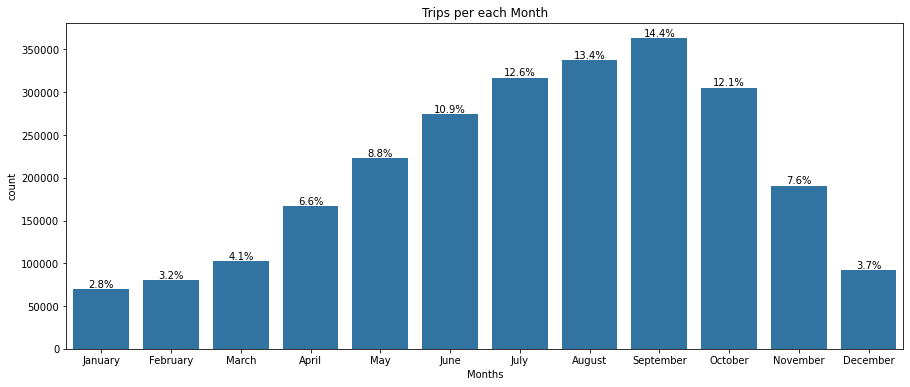

In [36]:
# Visualizing trips per each month
plt.figure(figsize=(15, 6))
sb.countplot(x=df.month, color=color[0])
plt.xlabel('Months')
plt.title('Trips per each Month')
for ind, mon in enumerate(months):
    counts = df.month.value_counts().loc[mon]
    x = counts / df.shape[0] *100
    plt.text(ind, counts+2000, '{:0.01f}%'.format(x), ha='center');

* September has the most trips over the year with 363185 trips with a perdent of 14.4%.
* The third quarter of the year has the most trips with a combined percent of 40.4%.

In [37]:
# Investigating trips per day
days = df.groupby(['month', 'day']).size().reset_index(name='trips')
trips_per_day = days.sort_values(by=['trips'], axis=0, ascending=False)
trips_per_day

,month,day,trips
267,September,20,14282
274,September,27,14025
258,September,11,13661
252,September,5,13661
266,September,19,13554
...,...,...,...
19,January,20,0
123,April,31,0
61,February,31,0
185,June,31,0


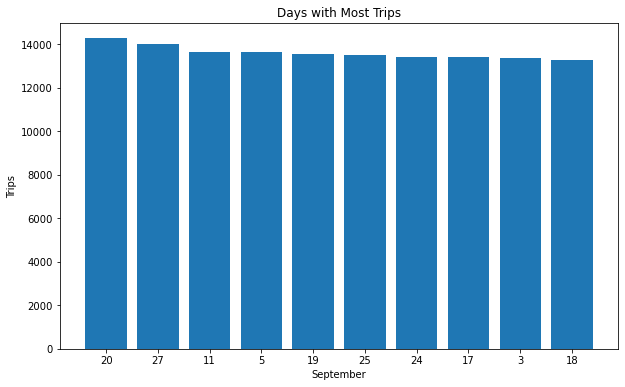

In [38]:
# Visualizing trips per day
plt.figure(figsize=(10, 6))
max_10_days = trips_per_day.iloc[:10].copy()
max_10_days.day = max_10_days.day.astype(str)
plt.bar(data=max_10_days, x='day', height='trips')
plt.title('Days with Most Trips')
plt.xlabel('September')
plt.ylabel('Trips');

* September 20th has the most trips over the year with 14282 trips.

In [39]:
# Investigating trips per each weekday
trips_per_wday = df.weekday.value_counts()
trips_per_wday

Wednesday    389441
Thursday     386613
Friday       385502
Tuesday      384487
Monday       372415
Saturday     319076
Sunday       285237
Name: weekday, dtype: int64

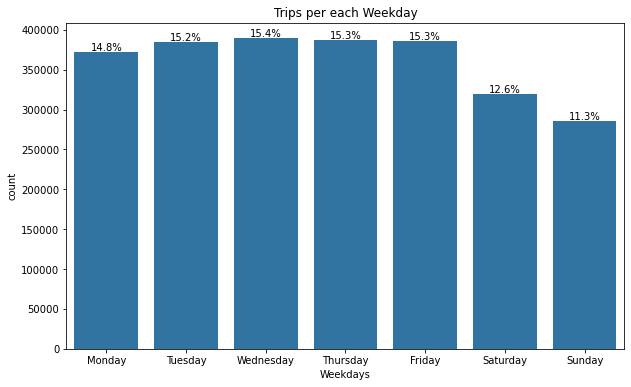

In [40]:
# Visualizing trips per each weekday
plt.figure(figsize=(10, 6))
sb.countplot(x=df.weekday, color=color[0])
plt.xlabel('Weekdays')
plt.title('Trips per each Weekday')
for ind, week in enumerate(week_days):
    counts = df.weekday.value_counts().loc[week]
    x = counts / df.shape[0] *100
    plt.text(ind, counts+2000, '{:0.01f}%'.format(x), ha='center');

* Wednesday has the most trips over the week with 389441 trips.
* Also it appears that the weekends has the least trips comparing to workdays.

#### Exploring distribution of trips during the day

In [41]:
df.hour.value_counts()

17    284963
8     229861
16    216384
18    214947
15    151771
19    150266
9     141673
12    133678
14    133164
13    133058
7     130163
11    115794
20    103779
10    103625
21     76288
22     55758
6      47183
23     35419
0      20430
5      15066
1      14258
2       8764
4       3397
3       3082
Name: hour, dtype: int64

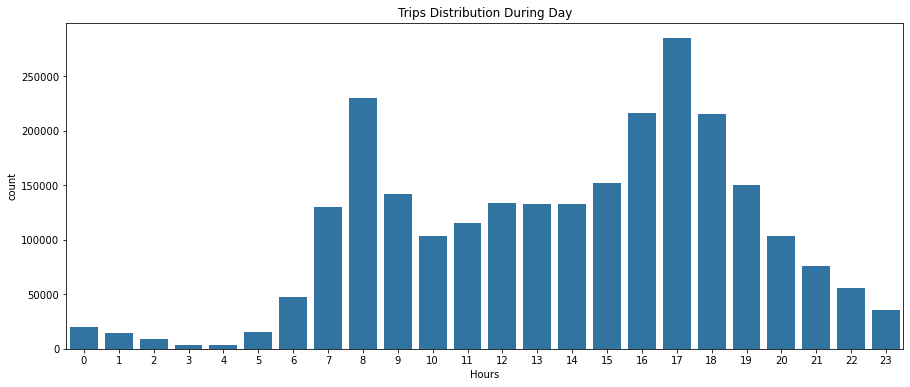

In [42]:
# Visualizing trips distribution during day
plt.figure(figsize=(15, 6))
sb.countplot(x=df.hour, color=color[0])
plt.xlabel('Hours')
plt.title('Trips Distribution During Day');

We have two peaks @ two timeframes (08:00-09:00) & (17:00-18:00) hours.

#### Exploring distribution of trips duration

In [43]:
df.tripduration.value_counts()

6.5        18697
6.0        18672
6.2        18657
5.8        18518
5.5        18348
           ...  
1244.9         1
2665.3         1
15518.1        1
942.8          1
2783.6         1
Name: tripduration, Length: 7933, dtype: int64

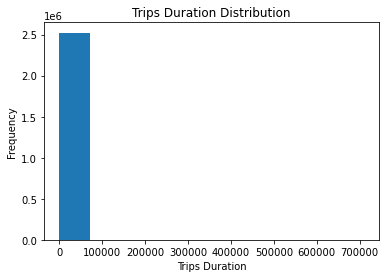

In [44]:
plt.hist(df.tripduration)
plt.title('Trips Duration Distribution')
plt.xlabel('Trips Duration')
plt.ylabel('Frequency');

* There are some outliers that we need to drop

In [45]:
# Checking the percentiles of the data
df.tripduration.describe(percentiles=[0.95, 0.97, 0.98, 0.99])

count    2.522771e+06
mean     3.630686e+01
std      1.830051e+03
min      1.000000e+00
50%      1.180000e+01
95%      4.430000e+01
97%      5.980000e+01
98%      7.490000e+01
99%      1.024000e+02
max      7.094523e+05
Name: tripduration, dtype: float64

In [46]:
# Dropping the data higher than the 98%
df = df.query('tripduration <= 75')

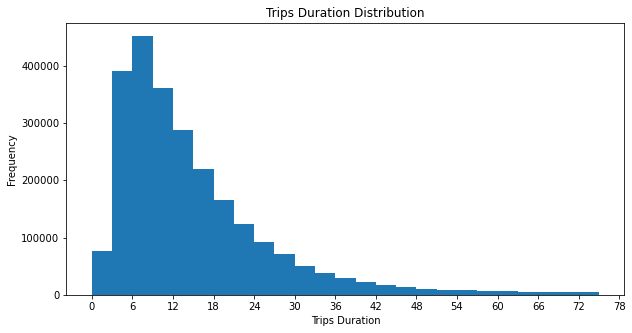

In [47]:
# Visualizing trips duration distributtion
plt.figure(figsize=(10, 5))
bins = np.arange(0, 75+3, 3)
plt.hist(df.tripduration, bins=bins);
ticks = np.arange(0, 75+6, 6)
plt.xticks(ticks, ticks)
plt.title('Trips Duration Distribution')
plt.xlabel('Trips Duration')
plt.ylabel('Frequency');

* Found that the distribution is much skewed to the right with a peak @ (6:9 mins) bin.

#### Exploring distribution of users age

In [48]:
df.age.value_counts()

50     252618
25     137740
26     130877
27     130563
24     129643
        ...  
104         1
102         1
96          1
87          1
83          1
Name: age, Length: 82, dtype: int64

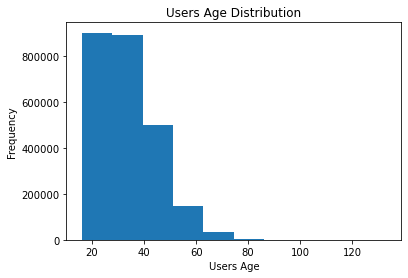

In [49]:
plt.hist(df.age)
plt.title('Users Age Distribution')
plt.xlabel('Users Age')
plt.ylabel('Frequency');

* There are some outliers that we need to drop

In [50]:
# Checking the percentiles of the data
df.age.describe(percentiles=[0.95, 0.97, 0.98, 0.99])

count    2.472531e+06
mean     3.412457e+01
std      1.149186e+01
min      1.600000e+01
50%      3.000000e+01
95%      5.500000e+01
97%      5.900000e+01
98%      6.100000e+01
99%      6.500000e+01
max      1.330000e+02
Name: age, dtype: float64

In [51]:
# Dropping the data higher than the 99%
df = df.query('age <= 65')

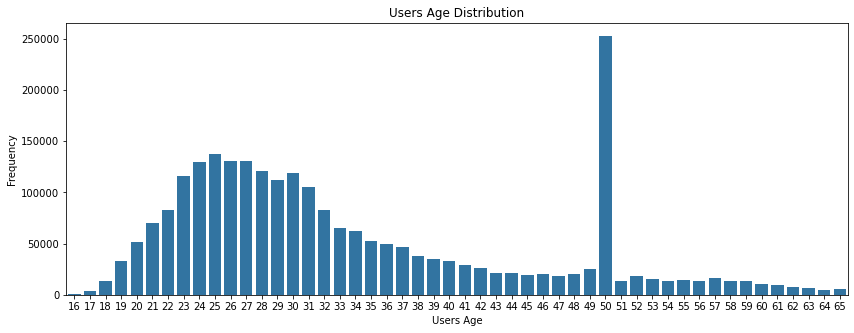

In [52]:
# Visualizing users age distributtion
plt.figure(figsize=(14, 5))
sb.countplot(x=df.age, color=color[0])
plt.title('Users Age Distribution')
plt.xlabel('Users Age')
plt.ylabel('Frequency');

* Found that the distribution is skewed to the right with a peak @ 25 years old, except for a peak anomaly @ 50 years old bar.
* We will try to find an explanation for that anomaly later.

#### Exploring users type

In [53]:
df.usertype.value_counts()

Subscriber    1961933
Customer       490363
Name: usertype, dtype: int64

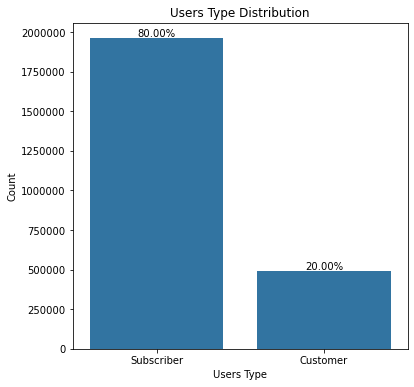

In [54]:
# Visualizing Users Type
plt.figure(figsize=(6, 6))
ax = sb.countplot(x=df.usertype, color=color[0]);
plt.title('Users Type Distribution')
plt.xlabel('Users Type')
plt.ylabel('Count')
# get current xtick positions & labels
pos, lab = plt.xticks()
# get the current oredr
xticks_order = [x.get_text() for x in lab]
# loop over xticks_order (enumerate creates a counter)
for ind, i in enumerate(xticks_order):
    # use .loc[] to access values by index
    counts = df.usertype.value_counts().loc[i]
    x = counts / df.shape[0] *100
    plt.text(ind, counts+10000, '{:0.02f}%'.format(x), ha='center');
# don't use scientific notation for large numbers
ax.yaxis.get_major_formatter().set_scientific(False)

* 80% of users are subscribers & the other 20% are customers.

#### Exploring users gender

In [55]:
df.gender.value_counts()

male      1618339
female     580502
other      253455
Name: gender, dtype: int64

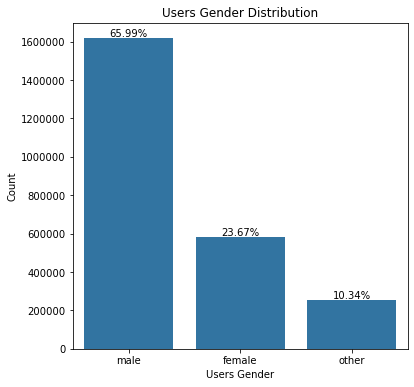

In [56]:
# Visualizing Users Gender
plt.figure(figsize=(6, 6))
ax = sb.countplot(x=df.gender, color=color[0]);
plt.title('Users Gender Distribution')
plt.xlabel('Users Gender')
plt.ylabel('Count')
# get current xtick positions & labels
pos, lab = plt.xticks()
# get the current oredr
xticks_order = [x.get_text() for x in lab]
# loop over xticks_order (enumerate creates a counter)
for ind, i in enumerate(xticks_order):
    # use .loc[] to access values by index
    counts = df.gender.value_counts().loc[i]
    x = counts / df.shape[0] *100
    plt.text(ind, counts+10000, '{:0.02f}%'.format(x), ha='center');
# don't use scientific notation for large numbers
ax.yaxis.get_major_formatter().set_scientific(False)

* 65.99% of users are males, 23.67% are females & the remaining 10.34% are unknowns.

#### Diving into 50 years old peak

In [57]:
df50 = df.query('age == 50')
df50.head(2)

,tripduration,starttime,endtime,start_id,start_name,start_lat,start_lon,end_id,end_name,end_lat,end_lon,bikeid,usertype,birth_year,gender,hour,day,month,weekday,age
5,9.2,2019-01-01 00:50:01.037,2019-01-01 00:59:10.319,104,Harvard University Radcliffe Quadrangle at She...,42.380287,-71.125107,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,4050,Customer,1969,other,0,1,January,Tuesday,50
13,42.2,2019-01-01 01:19:30.544,2019-01-01 02:01:41.694,342,Boylston St at Jersey St,42.344651,-71.097325,58,Mugar Way at Beacon St,42.355536,-71.072869,1534,Customer,1969,other,1,1,January,Tuesday,50


In [58]:
df50.describe()

,tripduration,start_lat,start_lon,end_lat,end_lon,birth_year,hour,day,age
count,252618.000000,252618.000000,252618.000000,252618.000000,252618.000000,252618.0,252618.000000,252618.000000,252618.0
mean,24.126130,42.356039,-71.083645,42.355618,-71.083469,1969.0,14.444196,15.840938,50.0
std,16.043998,0.086040,0.144012,0.120480,0.201895,0.0,4.724063,8.852323,0.0
min,1.000000,0.000000,-71.166491,0.000000,-71.166491,1969.0,0.000000,1.000000,50.0
25%,12.000000,42.348074,-71.103945,42.347763,-71.104079,1969.0,12.000000,8.000000,50.0
50%,20.200000,42.355536,-71.082383,42.354979,-71.082383,1969.0,15.000000,16.000000,50.0
75%,31.800000,42.365673,-71.062679,42.365673,-71.062679,1969.0,18.000000,24.000000,50.0
max,75.000000,42.414273,0.000000,42.414273,0.000000,1969.0,23.000000,31.000000,50.0


In [59]:
df50.gender.value_counts()

other     234006
male       14784
female      3828
Name: gender, dtype: int64

In [60]:
df50.usertype.value_counts()

Customer      231667
Subscriber     20951
Name: usertype, dtype: int64

In [61]:
df.query('gender == "other"').age.value_counts()

50    234006
49      2421
31      1680
27      1144
25      1087
24      1032
30       854
22       844
26       778
29       698
23       695
40       670
38       659
21       652
34       599
20       528
32       516
35       503
53       487
36       464
28       401
43       331
39       317
37       263
46       243
41       186
19       178
54       167
33       142
56       142
42       134
44       111
47        99
48        69
59        60
51        46
45        41
60        40
61        40
18        33
55        31
57        31
58        23
52         5
62         2
63         1
17         1
65         1
Name: age, dtype: int64

In [62]:
df.query('usertype == "Customer"').age.value_counts()

50    231667
24     19196
26     17006
23     16682
25     16463
30     15429
27     15200
22     13566
28     13452
29     11849
21     10702
31     10270
20      9725
19      8066
32      7278
33      6701
34      5998
36      5780
35      4630
18      4177
37      3353
39      3053
38      3003
40      2883
41      2351
49      2315
42      2136
45      2122
44      2088
48      2015
46      1980
43      1969
47      1880
51      1701
52      1644
53      1567
54      1520
17      1398
55      1233
57      1183
56      1163
59       776
58       753
60       565
61       440
62       372
16       311
63       293
64       254
65       205
Name: age, dtype: int64

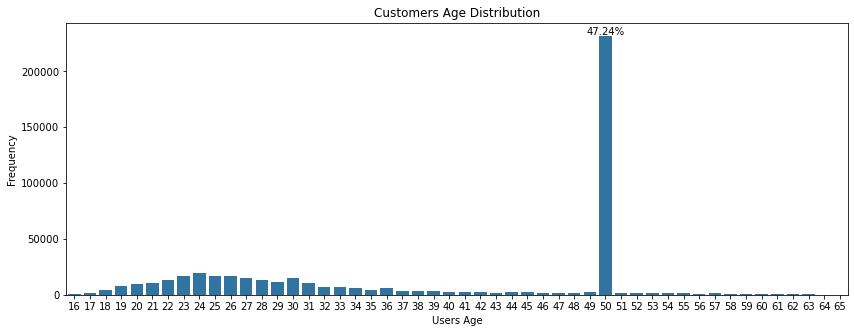

In [63]:
# Visualizing Customers age distributtion
plt.figure(figsize=(14, 5))
sb.countplot(x=df.query('usertype == "Customer"').age, color=color[0])
plt.title('Customers Age Distribution')
plt.xlabel('Users Age')
plt.ylabel('Frequency');
counts = df.query('usertype == "Customer"').age.value_counts()[50]
x = counts / df.query('usertype == "Customer"').shape[0] *100
plt.text(34, counts+1000, '{:0.02f}%'.format(x), ha='center');

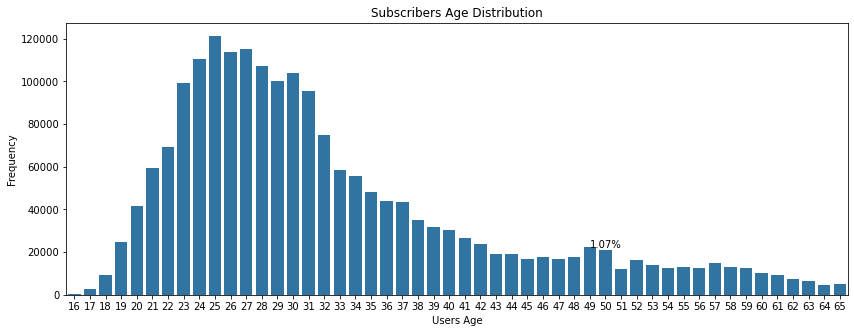

In [64]:
# Visualizing Subscribers age distributtion
plt.figure(figsize=(14, 5))
sb.countplot(x=df.query('usertype == "Subscriber"').age, color=color[0])
plt.title('Subscribers Age Distribution')
plt.xlabel('Users Age')
plt.ylabel('Frequency');
counts = df.query('usertype == "Subscriber"').age.value_counts()[50]
x = counts / df.query('usertype == "Subscriber"').shape[0] *100
plt.text(34, counts+1000, '{:0.02f}%'.format(x), ha='center');

* It looks like that the distribution of the data is not changed much in the 50 years old frame, except that almost all of them are customers with undefined gender.
* So, the only explanation I can think of is that when a customer does not enter his birth year, the default is set to 1969 which leads to 50 years old.

#### Exploring the most popular stations (start & end)

In [65]:
top_start = df.start_name.value_counts()[:10]
top_end = df.end_name.value_counts()[:10]

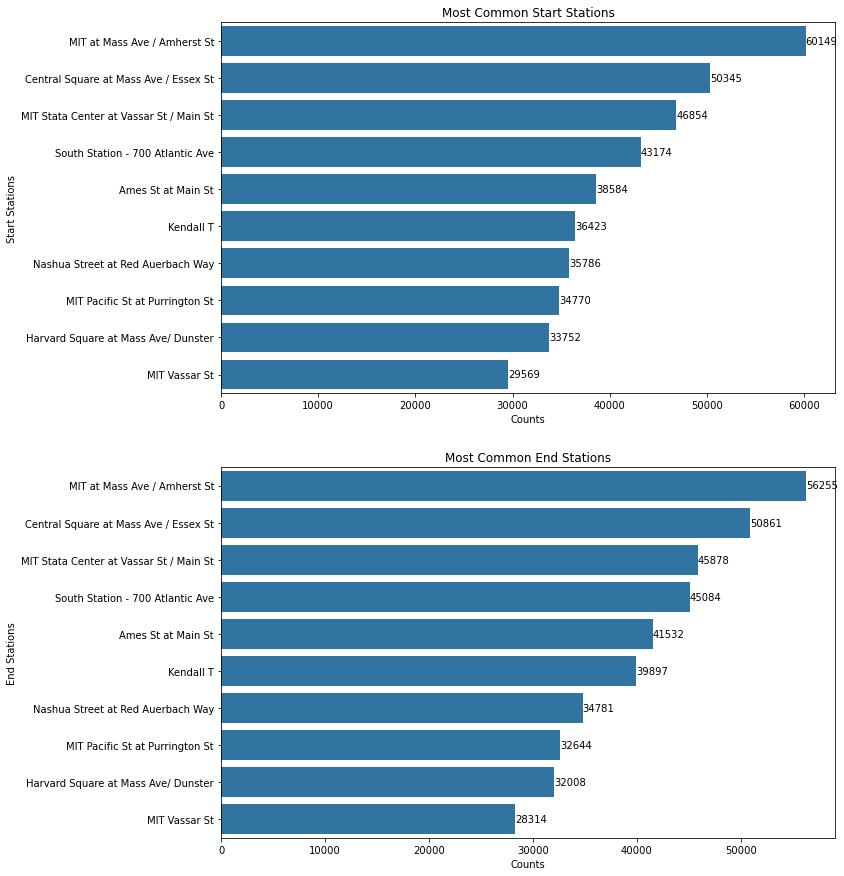

In [66]:
# Visualizing most popular stations (start & end)
plt.figure(figsize=(11, 15))
plt.subplot(2, 1, 1)
sb.barplot(y=top_start.index, x=top_start, color=color[0])
plt.title('Most Common Start Stations')

for ind, count in enumerate(top_start):
    plt.text(count+10, ind, count, va='center')
plt.ylabel('Start Stations')
plt.xlabel('Counts')

plt.subplot(2, 1, 2)
sb.barplot(y=top_start.index, x=top_end, color=color[0])
plt.title('Most Common End Stations')
for ind, count in enumerate(top_end):
    plt.text(count+10, ind, count, va='center')
plt.ylabel('End Stations')
plt.xlabel('Counts');

* The top two start & end stations are:

No. | Station | Start Times | End Times
--- | --- | --- | ---
1 | MIT at Mass Ave / Amherst St | 60149 | 56255
2 | Central Square at Mass Ave / Essex St | 50345 | 50861

#### Exploring the most common trips (from start to end)

In [67]:
# Extracting counts of each trip
top_trips_counts = df.groupby(['start_name', 'end_name']).size().reset_index(name='counts')

# Extracting the average of trip duration, age data of each trip
top_trips = df.groupby(['start_name', 'end_name'])\
                    [['tripduration', 'age']].mean().reset_index()

# Adding counts to the last data
top_trips['counts'] = top_trips_counts.counts

# Sorting the values
top_trips = top_trips.sort_values(by='counts', ascending=False).reset_index()
top_trips.drop(columns='index', inplace=True)
top_trips['trip'] = 'from \"' + top_trips['start_name'] + '\" to \"'+ top_trips['end_name'] + '\"'
top_trips.head(5)

,start_name,end_name,tripduration,age,counts,trip
0,MIT Pacific St at Purrington St,MIT Stata Center at Vassar St / Main St,5.489599,26.654593,4942,"from ""MIT Pacific St at Purrington St"" to ""MIT..."
1,MIT Stata Center at Vassar St / Main St,MIT Pacific St at Purrington St,5.310586,26.395168,4884,"from ""MIT Stata Center at Vassar St / Main St""..."
2,MIT at Mass Ave / Amherst St,MIT Vassar St,6.081591,28.022045,4400,"from ""MIT at Mass Ave / Amherst St"" to ""MIT Va..."
3,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,5.204088,23.546285,4159,"from ""MIT at Mass Ave / Amherst St"" to ""Beacon..."
4,MIT Pacific St at Purrington St,Ames St at Main St,6.575276,26.992381,4069,"from ""MIT Pacific St at Purrington St"" to ""Ame..."


In [68]:
# Saving top trips table for future use
top_trips.to_csv('top_trips_2019.csv', index=False)

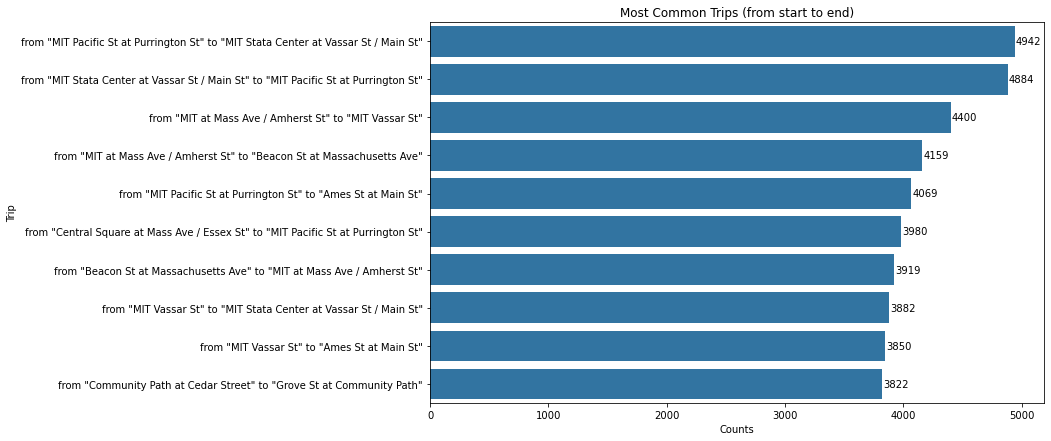

In [69]:
# Visualizing most common trips (from start to end)
plt.figure(figsize=(11, 7))
sb.barplot(x=top_trips[:10].counts, y=top_trips[:10].trip, color=color[0])
plt.title('Most Common Trips (from start to end)')

for ind, count in enumerate(top_trips[:10].counts):
    plt.text(count+10, ind, count, va='center')
plt.ylabel('Trip')
plt.xlabel('Counts');

* The top two common trips (from start to end) are:

1. From **MIT Pacific St at Purrington St** to **MIT Stata Center at Vassar St / Main St** with 4942 occurrences
2. From **MIT Stata Center at Vassar St / Main St** to **MIT Pacific St at Purrington St** with 4884 occurrences

#### Diving into the top two common trips

In [70]:
# Defining a function to query data of the trips by their order in the previous table
def query_data(data, order:int):
    """
    To query the data of the trips by their order in the previous table from the main dataframe df
    """
    start = top_trips.start_name[order-1]
    end = top_trips.end_name[order-1]
    final = data.query('start_name == @start & end_name == @end')
    name = top_trips.trip[order-1]
    return final, name

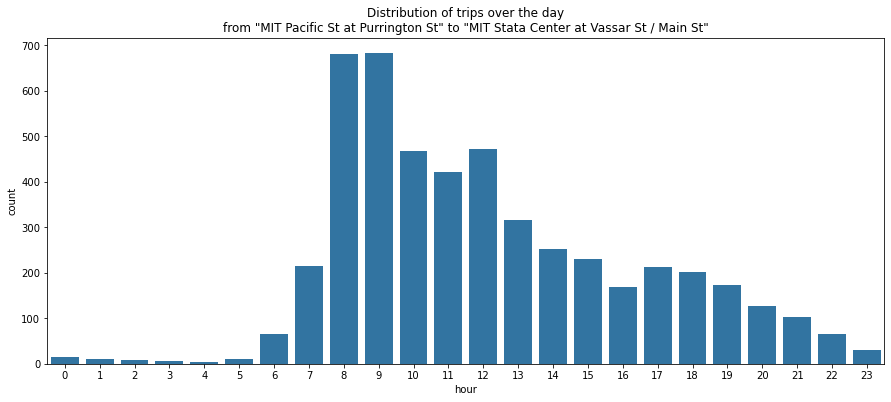

In [71]:
first_top_trip, first_name = query_data(df, 1)

# Visualizing trips distribution per day for first trip
plt.figure(figsize=(15, 6))
sb.countplot(data=first_top_trip, x='hour', color=color[0])
plt.title('Distribution of trips over the day\n{}'.format(first_name));

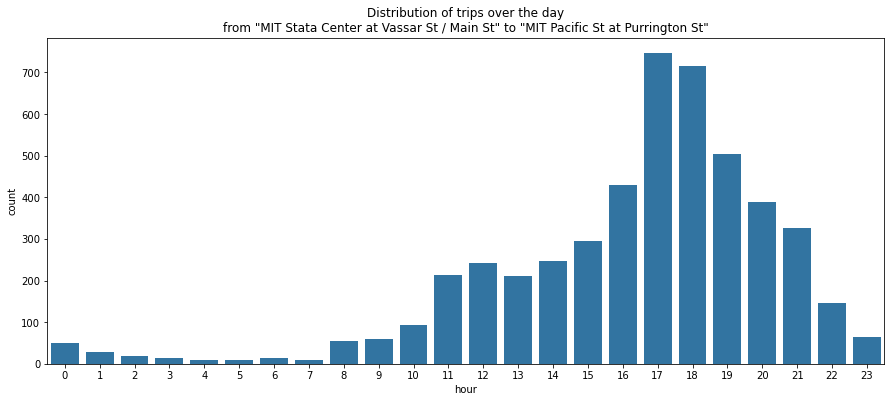

In [72]:
second_top_trip, second_name = query_data(df, 2)

# Visualizing trips distribution per day for second trip
plt.figure(figsize=(15, 6))
sb.countplot(data=second_top_trip, x='hour', color=color[0])
plt.title('Distribution of trips over the day\n{}'.format(second_name));

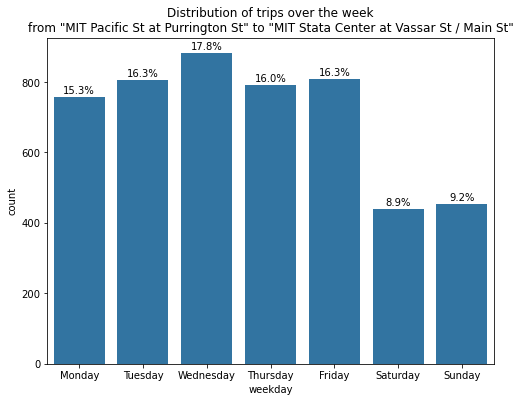

In [73]:
# Visualizing trips distribution per week for first trip
plt.figure(figsize=(8, 6))
sb.countplot(x=first_top_trip.weekday, color=color[0]);
for ind, week in enumerate(week_days):
    counts = first_top_trip.weekday.value_counts().loc[week]
    x = counts / first_top_trip.shape[0] *100
    plt.text(ind, counts+10, '{:0.01f}%'.format(x), ha='center')
plt.title('Distribution of trips over the week\n{}'.format(first_name));

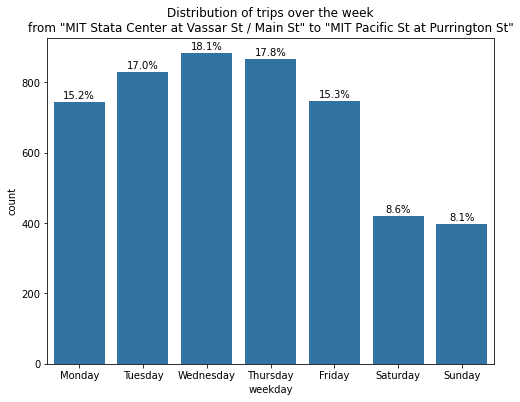

In [74]:
# Visualizing trips distribution per week for second trip
plt.figure(figsize=(8, 6))
sb.countplot(x=second_top_trip.weekday, color=color[0]);
for ind, week in enumerate(week_days):
    counts = second_top_trip.weekday.value_counts().loc[week]
    x = counts / second_top_trip.shape[0] *100
    plt.text(ind, counts+10, '{:0.01f}%'.format(x), ha='center')
plt.title('Distribution of trips over the week\n{}'.format(second_name));

* Some insights into these top two trips:

1. Trips on each working day are almost twice that on each weekend days
2. Trips from **MIT Pacific St at Purrington St** to **MIT Stata Center at Vassar St / Main St** has two peaks @ two timeframes (08:00-09:00) & (09:00-10:00) hours
3. From **MIT Stata Center at Vassar St / Main St** to **MIT Pacific St at Purrington St** has two peaks @ two timeframes (17:00-18:00) & (18:00-19:00) hours
4. These suggest that people who lives near **MIT Stata Center at Vassar St / Main St** go to their work near **MIT Pacific St at Purrington St** in the morning and return at the end of the day *using __bicycles__*.

#### Maping top 10 trips starting from or ending at a specific station

In [75]:
# Defining a function to map the top 10 trips starting from a specific station
def mapping_top_10_trips_from_a_station(start_station: 'str', zoom_start=14):
    """
    Map the top 10 trips starting from a specific station using "top_trips" & "df" datasets
    Input:
        start_station = starting station name
        zoom_start = zoom of the map at the start, Default=14
    Output: a map showing the top 10 trips starting from the specified station located by their coordinates
    """
    # Extracting end_stations & counts of the top 10 trips starting from the specified station using "top_trips" dataset
    template = top_trips.query('start_name == @start_station')[['end_name', 'counts']].head(10)
    
    # Preparing lists of start station name, latitude & longitude using "df" dataset to be added to "template" dataset
    start_name_list = 10 * [start_station]
    start_lat_list = 10 * [df.query('start_name == @start_station').start_lat.unique()[0]]
    start_lon_list = 10 * [df.query('start_name == @start_station').start_lon.unique()[0]]
    
    # Preparing lists of end stations latitude & longitude using "df" dataset to be added to "template" dataset
    end_lat_list, end_lon_list = [], []
    for station in template.end_name:
        end_lat_list.append(df.query('end_name == @station').end_lat.unique()[0])
        end_lon_list.append(df.query('end_name == @station').end_lon.unique()[0])
    
    # Adding all lists to "template" dataset
    template.insert(0, 'start_name', start_name_list)
    template.insert(3, 'start_lat', start_lat_list)
    template.insert(4, 'start_lon', start_lon_list)
    template.insert(5, 'end_lat', end_lat_list)
    template.insert(6, 'end_lon', end_lon_list)
    
    # Setting average of latitude & longitude to be used as the center of the map
    lat = np.mean(list(set(start_lat_list + end_lat_list)))
    lon = np.mean(list(set(start_lon_list + end_lon_list)))
    
    # Using Folium to draw a map while setting zoom to 14
    m = fm.Map(location=[lat, lon], zoom_start=zoom_start)
    
    # Setting order list to be used on the map
    order = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Tenth']

    # Preparing start station name & coordinates
    x = template.start_lat.iloc[0]
    y = template.start_lon.iloc[0]
    z = template.start_name.iloc[0]
    
    # Looping through end stations names & coordinates
    for ind in range(template.shape[0]):
        i = template.end_lat.iloc[ind]
        j = template.end_lon.iloc[ind]
        k = template.end_name.iloc[ind]
        
        # Draw a red bicycle marker for each end station, showing its name when hovering over it
        fm.Marker(location=[i, j],
                  tooltip='<b>{}</b>'.format(str(k)),
                  icon=fm.Icon(icon='bicycle',
                               prefix='fa',
                               color='red')).add_to(m)

        # Draw a blue line between each end station and the start station, showing its order when hovering over it
        fm.PolyLine(locations=[[i, j], [x, y]],
                    tooltip='<b>Order: {}</b>'.format(order[ind]),
                    color='blue',
                    opacity=0.7,
                    line_width=50).add_to(m)

        # Draw a black circle around each end station, showing the count of trips when hovering over it
        # The circle radius depends on the counts of trips ends at the station
        c = template.counts.iloc[ind]
        fm.CircleMarker(location=[i, j],
                        radius=c/100,
                        tooltip='<b>Trips ended here: {}</b>'.format(str(c)),
                        color='black',
                        opacity=0.6,
                        fill=True).add_to(m)

    # Draw a green bicycle marker for the start station, showing its name when hovering over it
    fm.Marker(location=[x, y],
              tooltip='<b>Starting Station:<br>{}</b>'.format(z),
              icon=fm.Icon(icon='bicycle',
                           prefix='fa',
                           color='green')).add_to(m)
    
    # Setting a title for the map
    title = 'Top 10 Trips Starting from \'{}\''.format(start_station)
    title_html = '<h3 align="center" style="font-size:16px"><b>{}</b></h3>'.format(title)   
    m.get_root().html.add_child(fm.Element(title_html))
    
    # Saving the map using the name of the start station into a html format
    m.save('Top 10 Trips Starting From \'{}\'.html'.format(start_station.replace('/', '-')))
    return m

####################################################################################
 
# Defining a function to map the top 10 trips ending at a specific station    
def mapping_top_10_trips_to_a_station(end_station: 'str', zoom_start=14):
    """
    Map the top 10 trips ending at a specific station using "top_trips" & "df" datasets
    Input:
        end_station = ending station name
        zoom_start = zoom of the map at the start, Default=14
    Output: a map showing the top 10 trips ending at the specified station located by their coordinates
    """
    # Extracting start_stations & counts of the top 10 trips ending at the specified station using "top_trips" dataset
    template = top_trips.query('end_name == @end_station')[['start_name', 'counts']].head(10)
    
    # Preparing lists of end station name, latitude & longitude using "df" dataset to be added to "template" dataset
    end_name_list = 10 * [end_station]
    end_lat_list = 10 * [df.query('end_name == @end_station').end_lat.unique()[0]]
    end_lon_list = 10 * [df.query('end_name == @end_station').end_lon.unique()[0]]
    
    # Preparing lists of start stations latitude & longitude using "df" dataset to be added to "template" dataset
    start_lat_list, start_lon_list = [], []
    for station in template.start_name:
        start_lat_list.append(df.query('start_name == @station').start_lat.unique()[0])
        start_lon_list.append(df.query('start_name == @station').start_lon.unique()[0])
    
    # Adding all lists to "template" dataset
    template.insert(1, 'end_name', end_name_list)
    template.insert(3, 'start_lat', start_lat_list)
    template.insert(4, 'start_lon', start_lon_list)
    template.insert(5, 'end_lat', end_lat_list)
    template.insert(6, 'end_lon', end_lon_list)
    
    # Setting average of latitude & longitude to be used as the center of the map
    lat = np.mean(list(set(start_lat_list + end_lat_list)))
    lon = np.mean(list(set(start_lon_list + end_lon_list)))
    
    # Using Folium to draw a map while setting zoom to 14
    m = fm.Map(location=[lat, lon], zoom_start=zoom_start)
    
    # Setting order list to be used on the map
    order = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Tenth']

    # Preparing end station name & coordinates
    x = template.end_lat.iloc[0]
    y = template.end_lon.iloc[0]
    z = template.end_name.iloc[0]

    # Looping through start stations names & coordinates
    for ind in range(template.shape[0]):
        i = template.start_lat.iloc[ind]
        j = template.start_lon.iloc[ind]
        k = template.start_name.iloc[ind]

        # Draw a green bicycle marker for each start station, showing its name when hovering over it
        fm.Marker(location=[i, j],
                  tooltip='<b>{}</b>'.format(str(k)),
                  icon=fm.Icon(icon='bicycle',
                               prefix='fa',
                               color='green')).add_to(m)

        # Draw a blue line between each end station and the start station, showing its order when hovering over it
        fm.PolyLine(locations=[[i, j], [x, y]],
                    tooltip='<b>Order: {}</b>'.format(order[ind]),
                    color='blue',
                    opacity=0.7,
                    line_width=50).add_to(m)

        # Draw a black circle around each start station, showing the count of trips when hovering over it
        # The circle radius depends on the counts of trips starts at the station
        c = template.counts.iloc[ind]
        fm.CircleMarker(location=[i, j],
                        radius=c/100,
                        tooltip='<b>Trips started here: {}</b>'.format(str(c)),
                        color='black',
                        opacity=0.6,
                        fill=True).add_to(m)

    # Draw a red bicycle marker for the end station, showing its name when hovering over it
    fm.Marker(location=[x, y],
              tooltip='<b>Ending Station:<br>{}</b>'.format(z),
              icon=fm.Icon(icon='bicycle',
                           prefix='fa',
                           color='red')).add_to(m)
    
    # Setting a title for the map
    title = 'Top 10 Trips Ending at \'{}\''.format(end_station)
    title_html = '<h3 align="center" style="font-size:16px"><b>{}</b></h3>'.format(title)   
    m.get_root().html.add_child(fm.Element(title_html))
    
    # Saving the map using the name of the end station into a html format
    m.save('Top 10 Trips Ending at \'{}\'.html'.format(end_station.replace('/', '-')))
    return m

In [76]:
station = top_trips.start_name[3]

mapping_top_10_trips_from_a_station(station, 14)

In [77]:
mapping_top_10_trips_to_a_station(station, 14)

### Insights

* September has the most trips over the year with 363185 trips with a perdent of 14.4%.
* The third quarter of the year has the most trips with a combined percent of 40.4%.
* September 20th has the most trips over the year with 14282 trips.
* Wednesday has the most trips over the week with 389441 trips.
* Weekends has the least trips comparing to workdays.
* Hourly distribution has two peaks @ two timeframes (08:00-09:00) & (17:00-18:00) hours.
* Trips duration distribution is much skewed to the right (shorter trips) with a peak @ (6:9 mins) bin.
* Users Age distribution is skewed to the right (younger users) with a peak @ 25 years old, except for a peak anomaly @ 50 years old bar.
* 80% of users are subscribers & the other 20% are customers.
* 65.99% of users are males, 23.67% are females & the remaining 10.34% are unknowns.
* There were some outliers in users age & trips durations that lead to mush disturbing the visualization of the data.
* Using **`describe()`** & **`percentiles`**, I managed to drop some of the outliers so we can keep a good track of the distribution of the data.

##### [Back to Top](#Back_to_Top)

<a id='e'></a>
## Bivariate Exploration

#### Exploring average trips duration per month, weekday & hour

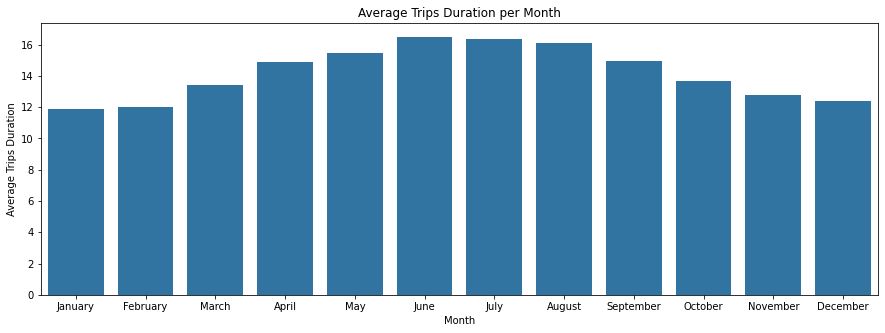

In [78]:
# Visualizing average trips duration per month
plt.figure(figsize=(15, 5))
sb.barplot(data=df, x='month', y='tripduration', color=color[0], errwidth=0)
plt.title('Average Trips Duration per Month')
plt.xlabel('Month')
plt.ylabel('Average Trips Duration');

* June has the highest average trips duration per month.

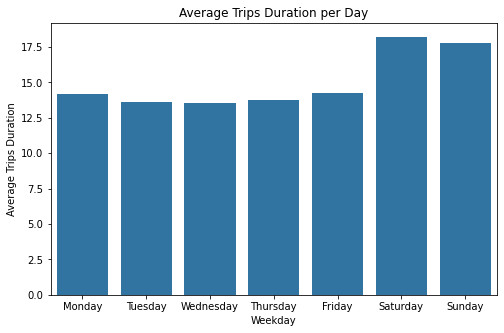

In [79]:
# Visualizing average trips duration per weekday
plt.figure(figsize=(8, 5))
sb.barplot(data=df, x='weekday', y='tripduration', color=color[0], errwidth=0)
plt.title('Average Trips Duration per Day')
plt.xlabel('Weekday')
plt.ylabel('Average Trips Duration');

* Saturday has the highest average trips duration per week.
* Weekends (Saturdays & Sundays) have longer trips comparing to workdays.

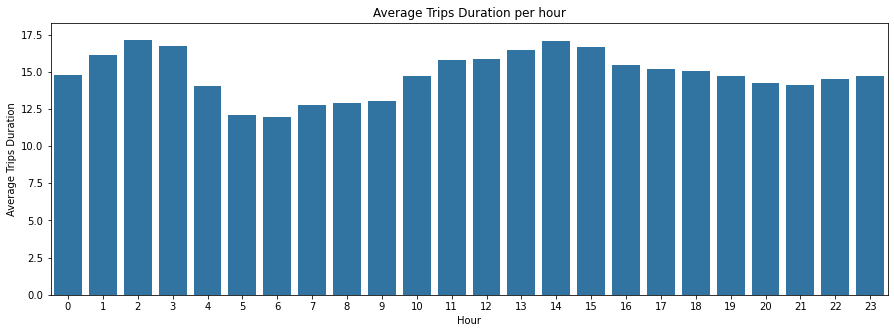

In [80]:
# Visualizing average trips duration per hour
plt.figure(figsize=(15, 5))
sb.barplot(data=df, x='hour', y='tripduration', color=color[0], errwidth=0)
plt.title('Average Trips Duration per hour')
plt.xlabel('Hour')
plt.ylabel('Average Trips Duration');

* Hourly average trips duration distribution has two peaks @ two timeframes (02:00-03:00) & (14:00-15:00) hours with an average of about 17 mins.

#### Exploring average trips duration per age

In [81]:
# Investigating average trips duration per each age
average_trip_per_age = df.groupby('age').tripduration.mean().reset_index(name='average')
average_trip_per_age = average_trip_per_age.sort_values(by=['average'], axis=0, ascending=False)
average_trip_per_age

,age,average
34,50,24.126130
0,16,20.901979
1,17,17.696756
38,54,15.798832
35,51,15.655548
2,18,15.605494
40,56,15.184737
47,63,15.182094
39,55,15.023044
26,42,14.980811


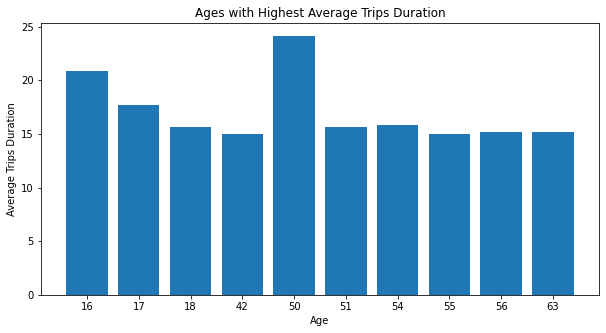

In [82]:
# Visualizing top 10 ages with highest average trips duration
max_10_ages = average_trip_per_age.iloc[:10].sort_values(by='age').copy()
max_10_ages.age = max_10_ages.age.astype(str)

plt.figure(figsize=(10, 5))
plt.bar(data=max_10_ages, x='age', height='average')
plt.title('Ages with Highest Average Trips Duration')
plt.xlabel('Age')
plt.ylabel('Average Trips Duration');

* The age of 50 years old has the highest average trips duration with an average of about 24 mins.

#### Exploring trips duration per users type & gender

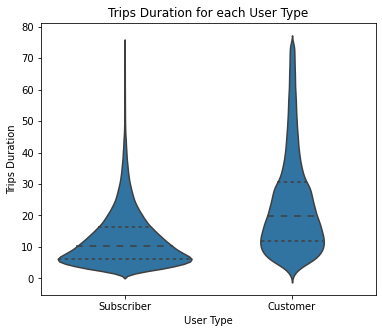

In [83]:
# Visualizing trips duration per users type
plt.figure(figsize=(6, 5))
sb.violinplot(data=df, x='usertype', y='tripduration', color=color[0], inner='quartile');
plt.title('Trips Duration for each User Type')
plt.xlabel('User Type')
plt.ylabel('Trips Duration');

* Subscribers have much shorter trips duration on average than customers who have a larger variety of trips duration.

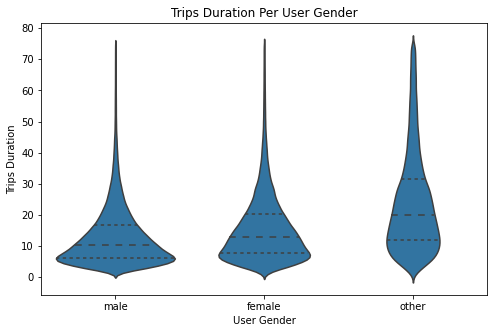

In [84]:
# Visualizing trips duration per user gender
plt.figure(figsize=(8, 5))
sb.violinplot(data=df, x='gender', y='tripduration', color=color[0], inner='quartile');
plt.title('Trips Duration Per User Gender')
plt.xlabel('User Gender')
plt.ylabel('Trips Duration');

* Males have slightly shorter trips duration on average than females.

#### Exploring user age per users type & gender

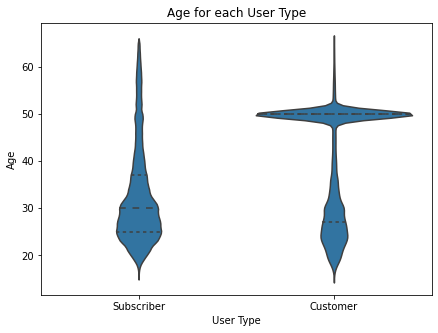

In [85]:
# Visualizing age per user type
plt.figure(figsize=(7, 5))
sb.violinplot(data=df, x='usertype', y='age', color=color[0], inner='quartile');
plt.title('Age for each User Type')
plt.xlabel('User Type')
plt.ylabel('Age');

* The 50 years old anomaly makes it difficult to compare user types in terms of age.

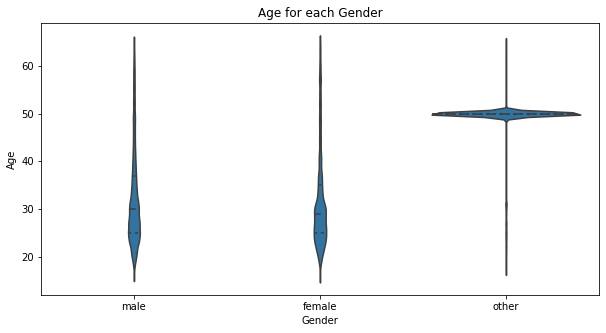

In [86]:
# Visualizing trips duration per user type
plt.figure(figsize=(10, 5))
sb.violinplot(data=df, x='gender', y='age', color=color[0], inner='quartile');
plt.title('Age for each Gender')
plt.xlabel('Gender')
plt.ylabel('Age');

* Males & females have almost the same age distribution.

#### Exploring users type & gender counts across months

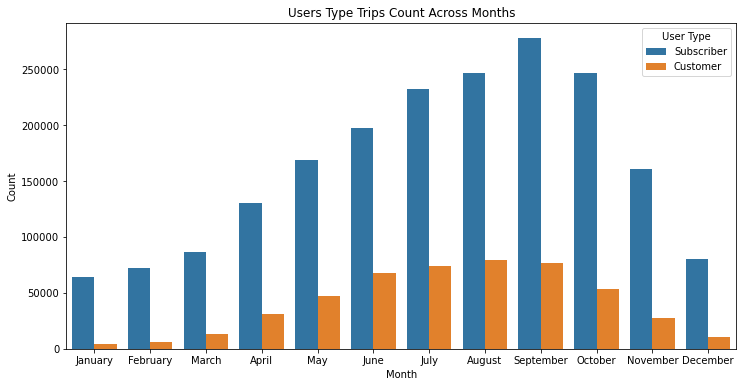

In [87]:
# Visualizing users type counts across months
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x='month', hue='usertype');
plt.title('Users Type Trips Count Across Months')
plt.legend(title='User Type')
plt.xlabel('Month')
plt.ylabel('Count');

* Subscribers have much more trips than customers through all months.
* September has the most trips over the year for subscribers but it's August for customers.

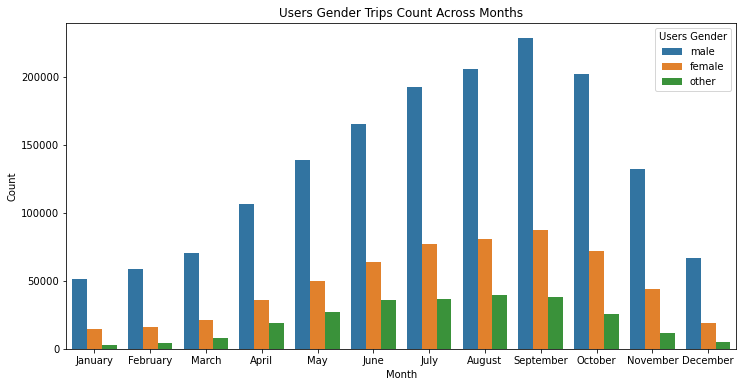

In [88]:
# Visualizing users gender counts across months
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x='month', hue='gender');
plt.title('Users Gender Trips Count Across Months')
plt.legend(title='Users Gender')
plt.xlabel('Month')
plt.ylabel('Count');

* Males have much more trips than females through all months.

#### Exploring 50 years old data Later

In [89]:
df_50 = df.query('age == 50')
df_50.head()

,tripduration,starttime,endtime,start_id,start_name,start_lat,start_lon,end_id,end_name,end_lat,end_lon,bikeid,usertype,birth_year,gender,hour,day,month,weekday,age
5,9.2,2019-01-01 00:50:01.037,2019-01-01 00:59:10.319,104,Harvard University Radcliffe Quadrangle at She...,42.380287,-71.125107,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,4050,Customer,1969,other,0,1,January,Tuesday,50
13,42.2,2019-01-01 01:19:30.544,2019-01-01 02:01:41.694,342,Boylston St at Jersey St,42.344651,-71.097325,58,Mugar Way at Beacon St,42.355536,-71.072869,1534,Customer,1969,other,1,1,January,Tuesday,50
14,41.9,2019-01-01 01:19:42.190,2019-01-01 02:01:33.685,342,Boylston St at Jersey St,42.344651,-71.097325,58,Mugar Way at Beacon St,42.355536,-71.072869,2504,Customer,1969,other,1,1,January,Tuesday,50
16,39.6,2019-01-01 01:21:47.173,2019-01-01 02:01:24.547,342,Boylston St at Jersey St,42.344651,-71.097325,58,Mugar Way at Beacon St,42.355536,-71.072869,3442,Customer,1969,other,1,1,January,Tuesday,50
17,39.1,2019-01-01 01:22:37.266,2019-01-01 02:01:44.182,342,Boylston St at Jersey St,42.344651,-71.097325,58,Mugar Way at Beacon St,42.355536,-71.072869,2845,Customer,1969,other,1,1,January,Tuesday,50


### Insights

* June has the highest average trips duration per month.
* Saturday has the highest average trips duration per week.
* Weekends (Saturdays & Sundays) have longer trips comparing to workdays.
* Hourly average trips duration distribution has two peaks @ two timeframes (02:00-03:00) & (14:00-15:00) hours with an average of about 17 mins.
* The age of 50 years old has the highest average trips duration with an average of about 24 mins.
* Subscribers have much shorter trips duration on average than customers who have a larger variety of trips duration.
* The 50 years old anomaly makes it difficult to compare user types in terms of age.
* Subscribers have much more trips than customers through all months.
* Males have much more trips than females through all months.
* September has the most trips over the year for subscribers but it's August for customers.
* Males have slightly shorter trips duration on average than females.
* Males & females have almost the same age distribution.

##### [Back to Top](#Back_to_Top)

<a id='f'></a>
## Multivariate Exploration

#### Exploring comparison between average trips duration per month & per weekday of different users type

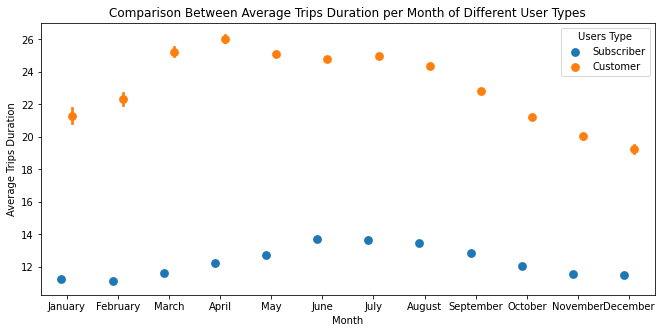

In [90]:
# Visualizing comparison between average trips duration per month of different users type
plt.figure(figsize=(11, 5))
sb.pointplot(data=df, x='month', y='tripduration', hue='usertype', linestyles='', dodge=0.2)
plt.title('Comparison Between Average Trips Duration per Month of Different User Types')
plt.legend(title='Users Type')
plt.xlabel('Month')
plt.ylabel('Average Trips Duration');

* Subscribers have much shorter trips duration on average than customers through all months.

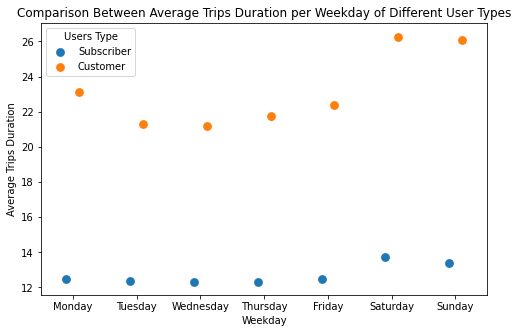

In [91]:
# Visualizing comparison between average trips duration per weekday of different users type
plt.figure(figsize=(8, 5))
sb.pointplot(data=df, x='weekday', y='tripduration', hue='usertype', linestyles='', dodge=0.2)
plt.title('Comparison Between Average Trips Duration per Weekday of Different User Types')
plt.legend(title='Users Type')
plt.xlabel('Weekday')
plt.ylabel('Average Trips Duration');

* Subscribers have much shorter trips duration on average than customers through all weekdays.

#### Exploring comparison between average trips duration per month & per weekday of different users gender

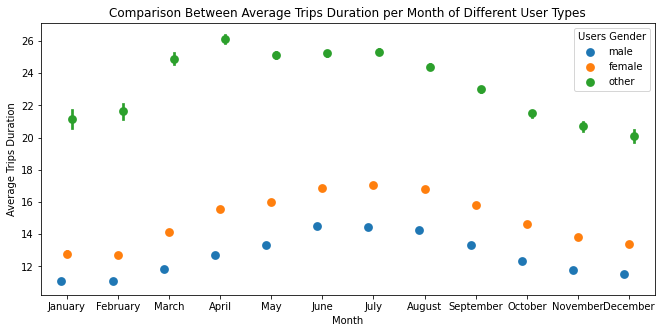

In [92]:
# Visualizing comparison between average trips duration per month of different users gender
plt.figure(figsize=(11, 5))
sb.pointplot(data=df, x='month', y='tripduration', hue='gender', linestyles='', dodge=0.2)
plt.title('Comparison Between Average Trips Duration per Month of Different User Types')
plt.legend(title='Users Gender')
plt.xlabel('Month')
plt.ylabel('Average Trips Duration');

* Males have shorter trips duration on average than females through all Months.

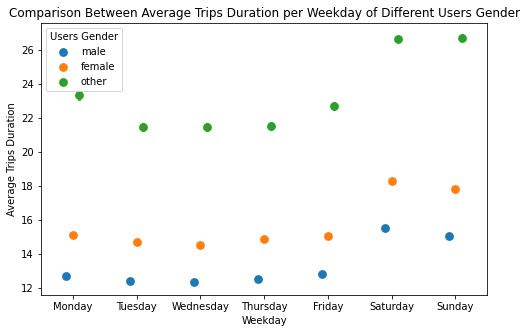

In [93]:
# Visualizing comparison between average trips duration per weekday of different users gender
plt.figure(figsize=(8, 5))
sb.pointplot(data=df, x='weekday', y='tripduration', hue='gender', linestyles='', dodge=0.2)
plt.title('Comparison Between Average Trips Duration per Weekday of Different Users Gender')
plt.legend(title='Users Gender')
plt.xlabel('Weekday')
plt.ylabel('Average Trips Duration');

* Males have shorter trips duration on average than females through all weekdays.

#### Exploring hourly average trip duration distribution across weekdays of customers & subscribers

In [94]:
# Investigating hourly average trip duration distribution across weekdays of customers & subscribers
hour_weekday = df.groupby(['weekday', 'usertype', 'hour']).tripduration.mean().reset_index()
cust = hour_weekday.query('usertype == "Customer"')
customer = cust.pivot('weekday', 'hour', 'tripduration')
subs = hour_weekday.query('usertype == "Subscriber"')
subscriber = subs.pivot('weekday', 'hour', 'tripduration')

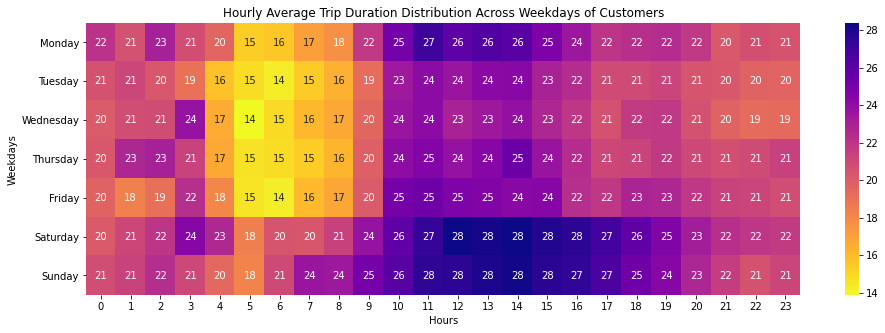

In [95]:
# Visualizing hourly average trip duration distribution across weekdays of customers
plt.figure(figsize=(16, 5))
sb.heatmap(data=customer, cmap='plasma_r', annot=True)
plt.title('Hourly Average Trip Duration Distribution Across Weekdays of Customers')
plt.xlabel('Hours')
plt.ylabel('Weekdays');

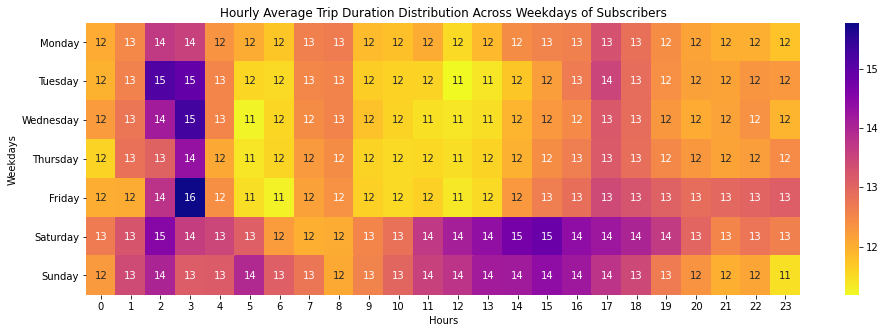

In [96]:
# Visualizing hourly average trip duration distribution across weekdays of subscribers
plt.figure(figsize=(16, 5))
sb.heatmap(data=subscriber, cmap='plasma_r', annot=True)
plt.title('Hourly Average Trip Duration Distribution Across Weekdays of Subscribers')
plt.xlabel('Hours')
plt.ylabel('Weekdays');

* Heatmaps show some differences on avergae trips duration distributions between both types.
* Subscribers are used to have longer trips from 2 am to 4 am & slightly shorter trips thoughout the day on work days whereas customers are used to have shorter trips from 4 am to 9 am & longer trips thoughout the day on work days.
* Both types have the same distributions on weekends except that customers have longer trips.

### Insights

* Subscribers have much shorter trips on average duration than customers through all months & all weekdays.
* Males have shorter trips duration on average than females through all Months & all weekdays.
* Heatmaps show some differences on avergae trips duration distributions between both types.
* Subscribers are used to have longer trips from 2 am to 4 am & slightly shorter trips thoughout the day on work days whereas customers are used to have shorter trips from 4 am to 9 am & longer trips thoughout the day on work days.
* Both types have the same distributions on weekends except that customers have longer trips.

##### [Back to Top](#Back_to_Top)